In [ ]:
# Importation des librairies de base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from datetime import datetime
import statsmodels.api as sm


### PARTIE 1

In [ ]:
A0 = 100    
alpha = 0.1 
sigma = 0.2 
B_barre = 75   
T = 1       
rho = 0.1  
n = 100

### PARTIE 2

In [ ]:
# Distance au défaut (dd)
dd = (np.log(A0) - np.log(B_barre) + (alpha - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

# Proba de défaut (PD)
PD = norm.cdf(-dd)

print(f"Distance au défaut : {dd:.2f}")
print(f"Probabilité de défaut : {PD:.4f}, soit {PD*100:.2f}%")

Distance au défaut : 1.84
Probabilité de défaut : 0.0330, soit 3.30%


### PARTIE 3

In [ ]:
# Générateur de nombres aléatoires
rng = np.random.default_rng(seed=42)

# Nombre de trajectoires simulées
M = 10_000

# Simuler F (choc commun) 
F = rng.standard_normal(M) 

# Simuler n valeurs de z̃ (chocs indépendats) 
z_tilde = rng.standard_normal((M, n)) 

# Calculer valeurs de z_i
z_i = np.sqrt(rho) * F[:, None] + np.sqrt(1 - rho) * z_tilde

# Simuler n valeurs de A (i,T)
A_T = A0 * np.exp((alpha - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z_i)

# 5) Calculer n valeurs de L (défaut ou non)
L_i = (A_T < B_barre).astype(int)

# Calculer proportion défauts 
L = L_i.mean(axis=1)  

# Comparaison valeurs PD 
mean_L = L.mean()
print(f"Moyenne PD SIMULÉES : {mean_L:.4f}")
print(f"PD THÉORIQUE : {PD:.4f}")

Moyenne PD SIMULÉES : 0.0334
PD THÉORIQUE : 0.0330


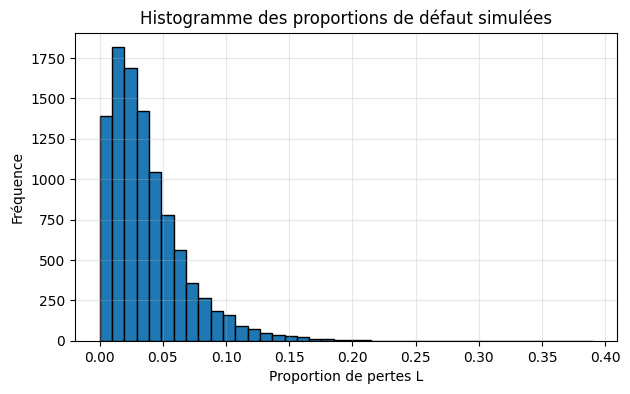

In [ ]:
plt.figure(figsize=(7, 4))
plt.hist(L, bins=40, edgecolor='black')
plt.title("Histogramme des proportions de défaut simulées")
plt.xlabel("Proportion de pertes L")
plt.ylabel("Fréquence")
plt.grid(alpha=0.3)
plt.show()

### PARTIE 4

In [ ]:
# Fonciton densité PD
def fonction_densité(x, PD, rho):
    x = np.asarray(x)
    # Éviter valeurs exactes 0 et 1
    x_clipped = np.clip(x, 1e-10, 1 - 1e-10)
    
    # Quantiles loi normale
    N_inv_x = norm.ppf(x_clipped)
    N_inv_PD = norm.ppf(PD)
    
    terme1 = np.sqrt((1 - rho) / rho)
    
    # Termes dans l'exponentielle
    a = -1 / (2 * rho)
    b = np.sqrt(1 - rho)
    c = N_inv_x
    d = N_inv_PD

    terme_exp1 = a * (b * c - d)**2
    terme_exp2 = 1/2 * N_inv_x**2
    
    densite = terme1 * np.exp(terme_exp1 + terme_exp2)
    
    return densite

/var/folders/bx/rtwm1h_55kq4g_m48zp38fnm0000gp/T/ipykernel_18421/1072636552.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=11)


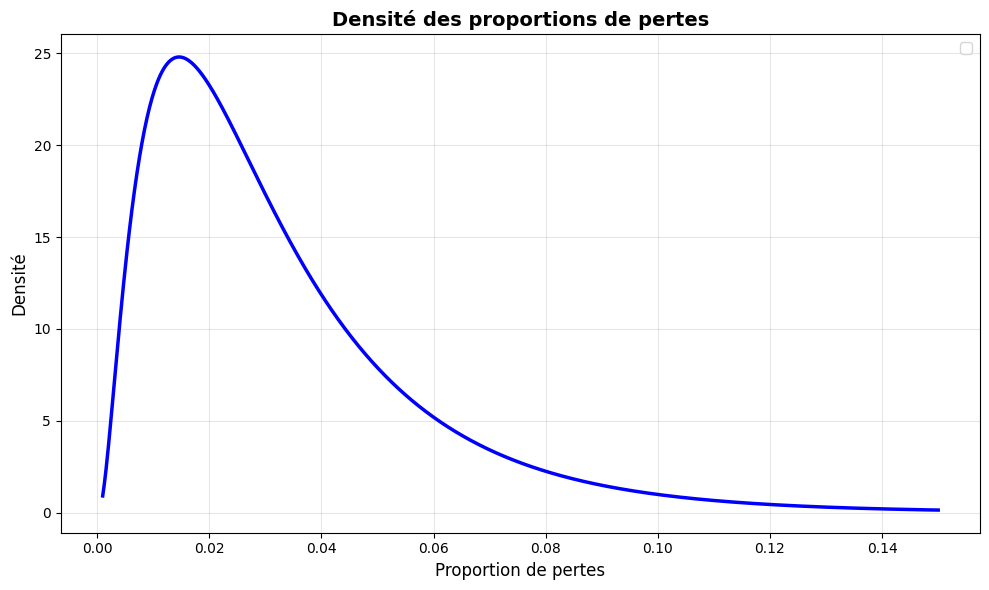

In [ ]:
x_grid = np.linspace(0.001, 0.15, 1000)
f_vals = fonction_densité(x_grid, PD, rho)

plt.figure(figsize=(10, 6))

# Courbe de densité théorique
plt.plot(x_grid, f_vals, 'b-', linewidth=2.5)

plt.title("Densité des proportions de pertes", fontsize=14, fontweight='bold')
plt.xlabel("Proportion de pertes", fontsize=12)
plt.ylabel("Densité", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### PARTIE 5

In [ ]:
def fonction_cumulative(x, PD, rho):
    x = np.asarray(x)
    # Éviter valeurs exactes 0 et 1
    x_clipped = np.clip(x, 1e-10, 1 - 1e-10)
    
    # Quantiles loi normale
    N_inv_x = norm.ppf(x_clipped)
    N_inv_PD = norm.ppf(PD)
    
    # Définition des termes
    e = np.sqrt(1 - rho)
    f = N_inv_x
    g = N_inv_PD
    h = np.sqrt(rho)

    cumulative = norm.cdf((e * f - g) / h)
    
    return cumulative

In [ ]:
# Calcul de Pr(L < 0.0823)
x_valeur = 0.0823
prob_cumulative = fonction_cumulative(x_valeur, PD, rho)

print("CALCUL ANALYTIQUE")
print(f"Pr(L < {x_valeur}) = {prob_cumulative:.4f}")

Pr(L < 0.0823) = 0.9499


In [ ]:
# Estimation empirique de Pr(L < 0.0823) à partir des simulations
x_seuil = 0.0823
prob_empirique = np.mean(L < x_seuil)

print(f"Pr(L < {x_seuil}) ESTIMÉE (simulations) : {prob_empirique:.4f}")
print(f"Pr(L < {x_seuil}) THÉORIQUE (Vasicek)   : {prob_cumulative:.4f}")